# PREDICTING REDDIT UPVOTES - Data exploration

## Data dictionary:
- **Title:** title of the reddit post
- **Upvote_ratio:** the percentage of upvotes from all votes on thread comment is on
- **Score:** number of upvotes on the comment
- **Gilded:** the number of gilded tags (premium likes) on the comment
- **Over_18:** Whether or not the thread has been marked as NSFW
- **Number_of_comments:** Number of comments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
reddit = pd.read_csv('Reddit.csv')
reddit.head()

,Unnamed: 0,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments
0,0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801
1,1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443
2,2,Do some research before spouting nonsense,0.90,50420,0,False,1008
3,3,Moving boxes arrive at the White House,0.81,149858,6,False,4392
4,4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157


In [3]:
reddit.Title.nunique()

7188

In [4]:
reddit.shape

(7471, 7)

In [5]:
#Dropping the unnamed column
reddit.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
#Checking the duplicated rows

reddit[reddit.duplicated()]

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments
508,My discus family.,0.99,1760,0,False,66
527,"Roses are red, butts are for eating",0.98,11304,0,False,43


## There are duplicated rows in the dataset

In [7]:
reddit.drop_duplicates(keep = 'first', inplace = True)

## We deleted the duplicate columns

In [8]:
#Columns in the dataset

columns = reddit.columns
print('The columns in the dataset are:', columns)

The columns in the dataset are: Index(['Title', 'Upvote_ratio', 'Score', 'Gilded', 'Over_18',
       'Number_of_Comments'],
      dtype='object')


## Basic data study

In [9]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7470
Data columns (total 6 columns):
Title                 7469 non-null object
Upvote_ratio          7469 non-null float64
Score                 7469 non-null int64
Gilded                7469 non-null int64
Over_18               7469 non-null bool
Number_of_Comments    7469 non-null int64
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 357.4+ KB


**There are no null values**

**Only one object column(title), over_18(boolean), others are numeric**

In [10]:
reddit.describe()

,Upvote_ratio,Score,Gilded,Number_of_Comments
count,7469.000000,7469.00000,7469.000000,7469.000000
mean,0.970513,3960.26215,0.054492,100.406480
std,0.032547,10658.43448,0.382536,452.474783
min,0.630000,53.00000,0.000000,0.000000
25%,0.960000,283.00000,0.000000,10.000000
50%,0.980000,795.00000,0.000000,26.000000
75%,0.990000,2703.00000,0.000000,73.000000
max,1.000000,169633.00000,17.000000,24155.000000


## Exploring each column separately

### Upvote_ratio

In [11]:
reddit.Upvote_ratio.value_counts()

0.99    2183
0.98    1636
0.97     910
1.00     730
0.96     603
0.95     407
0.94     253
0.93     175
0.92     146
0.91     105
0.90      73
0.89      50
0.88      39
0.87      36
0.86      23
0.85      16
0.81      13
0.84      12
0.80      10
0.83       9
0.82       8
0.76       6
0.79       6
0.77       3
0.75       3
0.71       3
0.74       3
0.72       2
0.66       2
0.78       1
0.63       1
0.73       1
0.67       1
Name: Upvote_ratio, dtype: int64

## Score - Dependent variable

In [12]:
reddit.Score.value_counts()

90      20
92      18
130     17
128     16
100     16
        ..
2747     1
698      1
2743     1
9172     1
4098     1
Name: Score, Length: 3577, dtype: int64

## Gilded

In [13]:
reddit.Gilded.value_counts()

0     7181
1      225
2       46
3        8
4        3
10       2
6        2
17       1
5        1
Name: Gilded, dtype: int64

## Over_18

In [14]:
reddit.Over_18.value_counts()

False    7405
True       64
Name: Over_18, dtype: int64

## Number_of_comments

In [15]:
reddit.Number_of_Comments.value_counts()[:50]

5     229
6     215
8     209
4     197
3     197
7     193
10    188
9     172
15    156
2     154
11    151
13    150
12    144
14    137
19    134
1     129
16    129
17    122
18    106
20     99
21     93
22     85
26     83
29     83
23     82
25     80
24     79
31     77
30     75
27     71
32     62
37     61
28     60
33     58
35     58
0      56
40     51
45     50
38     50
39     50
41     47
43     47
36     46
46     43
47     42
42     42
34     41
44     38
48     38
49     37
Name: Number_of_Comments, dtype: int64

## Stats for Title column

In [16]:
num_of_titles = reddit.Title.nunique()
max_len_title = max([len(x) for x in reddit['Title']])
avg_len_title = int(np.mean([len(x) for x in reddit['Title']]))
max_word_count = max([len(x.split()) for x in reddit['Title']])
avg_word_count = int(np.mean([len(x.split()) for x in reddit['Title']]))

print('Number of unique titles: \t{0}'.format(num_of_titles))
print('Max Length of a title: \t{0} characters'.format(max_len_title))
print('Avg Length of title: \t{0} characters'.format(avg_len_title))
print('Max words in title: \t{0} words'.format(max_word_count))
print('Avg words in title: \t{0} words'.format(avg_word_count))
unique_titles = reddit.Title.nunique()
print('#repeated titles:\t', len(reddit) - unique_titles)

Number of unique titles: 	7188
Max Length of a title: 	300 characters
Avg Length of title: 	47 characters
Max words in title: 	63 words
Avg words in title: 	8 words
#repeated titles:	 281


## Some titles are repeated and it could be due to different authors discussing about the same topic

In [17]:
#Checking the repeated columns
reddit[reddit.duplicated('Title')]

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments
168,Mom shows her baby elephant how to cross the r...,0.98,3858,0,False,39
232,I'm a 16 yr old blacksmith and I forged this w...,0.98,9039,0,False,127
314,This avalanche in Nepal,0.99,9426,0,False,152
406,hmmm,0.96,16563,1,False,146
407,It’s only fair,0.96,14234,0,False,148
...,...,...,...,...,...,...
7174,"Learning, but at what cost",0.97,217,0,False,22
7257,Business is boomin,0.99,313,0,False,2
7313,Does this count?,0.96,190,0,False,6
7373,Might as well just die,0.92,87,0,False,13


## Visualization

### Score - distribution

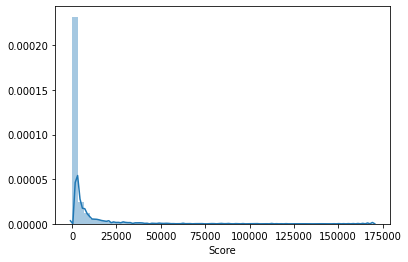

In [18]:
sns.distplot(reddit["Score"]);

**Right skewed distribution of the dependent variable**

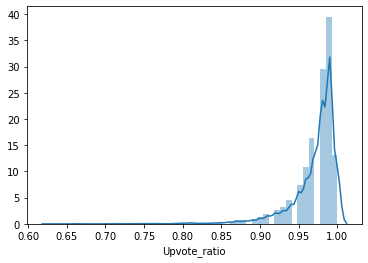

In [19]:
sns.distplot(reddit["Upvote_ratio"]);

**More number of titles have higher upvote ratios**

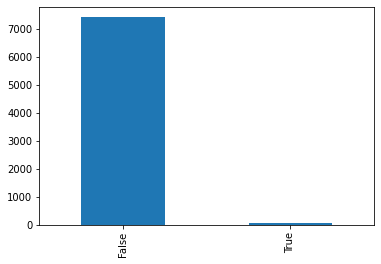

In [20]:
reddit.Over_18.value_counts().plot(kind = 'bar');

**More number of titles are also marked for readers aged < 18**

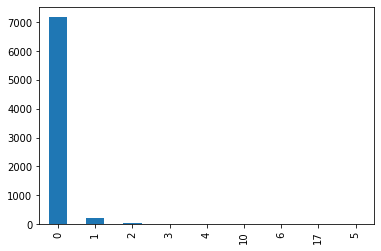

In [21]:
reddit.Gilded.value_counts().plot(kind = 'bar');

**Not a lot of authors were gilded for their posts**

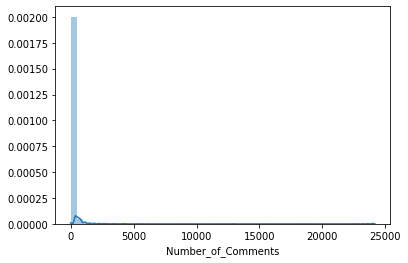

In [22]:
sns.distplot(reddit["Number_of_Comments"]);

In [23]:
#Number of characters in a comment

reddit['character_count'] = reddit['Title'].map(lambda x : len(x))

In [24]:
reddit.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,85
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,41
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,38
4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157,92


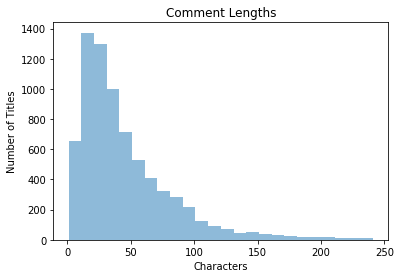

In [25]:
plt.hist(reddit['character_count'], bins=np.arange(1,250,10), alpha=0.5, label="Character Lengths");
plt.title('Comment Lengths');
plt.xlabel('Characters');
plt.ylabel('Number of Titles');

**More number of titles have character lengths between 0 and 150**

## Effect of character length on scores

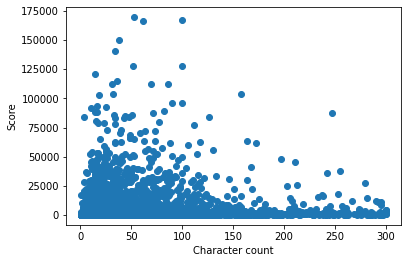

In [26]:
plt.scatter(reddit['character_count'], reddit['Score']);
plt.xlabel('Character count')
plt.ylabel('Score');

**Scores do not depend on the length of the title**

In [27]:
#NUMBER OF WORDS IN THE TITLE

import re
def word_count(text):
    wordList = re.sub("[^\w]", " ",  text).split()
    return len(wordList)

reddit['word_count'] = reddit['Title'].map(lambda x : word_count(x))

## Cleaning the titles

In [28]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [29]:
#Downloading stopwords from NLTK
#We don't remove No and Not as it will help in sentiment analysis
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.remove("no")

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#Enforcing proper spacing

def spaceURLs(df, column):
    '''This method is used to enforce proper spacing
    Ex: In the data, you may have '[the image](https://image.xyz)';
    this method creates space between alt text ("the image") and the URL.'''
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\[|\]', ' ', regex=True)
    return data

In [31]:
#Replace URLs

def replaceURL(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\(http\S+', 'URL', regex=True)
    return data

In [32]:
#Removing symbols

def removeSymbols(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('/r/', '', regex=True)
    data.loc[:, column] = data[column].str.replace('[^\.\'A-Za-z0-9]+', ' ', regex=True)
    return data

In [33]:
#Removing numbers

def removeNumbers(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\S*\d\S*', '', regex=True)
    return data

In [34]:
#Remove stop words

stop_words = stopwords.words('english')
stop_words.extend(["ca","http"])
def no_stop_words(list_tokens):    
    tokens_no_stop_word = []
    for elt in list_tokens: 
        tokens_no_stop_word.append([tok for tok in elt if tok not in stop_words])
    return(tokens_no_stop_word)

In [35]:
data = spaceURLs(reddit, 'Title')
data = replaceURL(reddit, 'Title')
data = removeNumbers(reddit, 'Title')
data = removeSymbols(reddit, 'Title')

In [36]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Title,House impeaches Trump for second time over Cap...,I'm a 16 yr old blacksmith and I forged this w...,Do some research before spouting nonsense,Moving boxes arrive at the White House,No One Took Us Seriously Black Cops Warned Ab...,US bans all cotton and tomato products from Xi...,Urban explorer of Reddit what was your I bette...,LPT As a lawyer don't take legal advice from R...,Pirate Bay Founder Thinks Parler s Inability t...,GME YOLO update Jan 13 2021
Upvote_ratio,0.72,0.9,0.9,0.81,0.98,0.88,0.93,0.94,0.88,0.89
Score,39464,29423,50420,149858,7768,112303,30184,32876,79607,37315
Gilded,2,0,0,6,0,0,0,0,2,17
Over_18,False,False,False,False,False,False,True,False,False,False
Number_of_Comments,8801,443,1008,4392,157,4072,3666,1766,3338,3016
character_count,56,85,41,38,92,69,62,54,77,29
word_count,9,18,6,7,15,12,11,11,12,6


In [37]:
reddit = data.copy()

## Sentiment Analysis

### The sentiment function of textblob returns two properties, *polarity*, and *subjectivity*.

- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [38]:
from textblob import TextBlob

In [39]:
# Create a function to get the subjectivity
def Subjectivity(text):
       return TextBlob(text).sentiment.subjectivity

In [40]:
# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [41]:
reddit['Subjectivity'] = reddit['Title'].apply(Subjectivity)
reddit['Polarity'] = reddit['Title'].apply(Polarity)

In [42]:
reddit.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56,9,0.000000,0.000000
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,85,18,0.200000,0.100000
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,41,6,0.000000,0.000000
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,38,7,0.000000,0.000000
4,No One Took Us Seriously Black Cops Warned Ab...,0.98,7768,0,False,157,92,15,0.433333,-0.166667


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
senti = SentimentIntensityAnalyzer()
for sentence in reddit['Title']:
    ss = senti.polarity_scores(sentence)

In [45]:
#analyzer = SentimentIntensityAnalyzer()
reddit['rating'] = reddit['Title'].apply(senti.polarity_scores)

In [46]:
reddit.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,rating
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56,9,0.000000,0.000000,"{'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp..."
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,85,18,0.200000,0.100000,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp..."
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,41,6,0.000000,0.000000,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp..."
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,38,7,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,No One Took Us Seriously Black Cops Warned Ab...,0.98,7768,0,False,157,92,15,0.433333,-0.166667,"{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'comp..."


In [47]:
reddit = pd.concat([reddit.drop(['rating'], axis=1), reddit['rating'].apply(pd.Series)], axis=1)

In [48]:
reddit.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,neg,neu,pos,compound
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56,9,0.000000,0.000000,0.292,0.708,0.000,-0.5106
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,85,18,0.200000,0.100000,0.000,0.735,0.265,0.6597
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,41,6,0.000000,0.000000,0.351,0.649,0.000,-0.4019
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,38,7,0.000000,0.000000,0.000,1.000,0.000,0.0000
4,No One Took Us Seriously Black Cops Warned Ab...,0.98,7768,0,False,157,92,15,0.433333,-0.166667,0.476,0.524,0.000,-0.8402


# This is the final dataset that we will further use for building our Machine Learning Model

### Extracting this dataset and storing it in a separate csv file

In [49]:
reddit.to_csv('reddit_final.csv', index = False)